In [1]:
from HSICLassoVI.models import api

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import *

## Data1: Additive model

In [3]:
N, P = 1000, 256
mean = np.zeros(P)
cov = np.eye(P)
np.random.seed(1)

$$
y\in\mathbb{R}^{1000}, X\in\mathbb{R}^{1000\times256}
$$

In [4]:
X = np.random.multivariate_normal(mean = mean, cov = cov, size = N)
y = -2*np.sin(2*X[:,0]) + np.power(X[:,1],2) + X[:,2] + np.exp(-X[:,3]) + np.random.normal(loc=0, scale=1, size=N)

$$
y=-2\sin(2X_1)+X_2^2+X_3+\exp(-X_4)+\epsilon
$$

In [5]:
data1 = pd.DataFrame(np.c_[y.reshape(-1,1),X], columns = ['y'] + [f'X{p+1}' for p in range(P)])
data1.describe()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.623418,0.035265,-0.016246,-0.019422,-0.014176,-0.006667,-0.021556,0.063818,0.019090,0.053621,...,-0.000810,0.002730,0.031753,0.017365,0.052825,-0.039389,0.006775,0.004025,0.067993,0.026414
std,3.171087,0.960858,1.008259,0.984227,0.997292,0.985489,1.005595,0.983818,1.002825,0.960739,...,0.994915,1.002630,1.009359,0.972909,1.043013,0.990642,0.965017,1.027639,1.009999,1.016014
min,-3.726762,-3.010532,-2.893541,-3.341487,-3.078955,-2.578108,-4.013615,-3.484873,-3.292884,-2.787861,...,-2.994682,-3.173462,-3.158534,-3.472781,-2.985545,-3.469917,-3.344767,-2.882288,-3.085308,-3.248678
25%,0.537925,-0.635812,-0.691061,-0.698757,-0.666415,-0.708603,-0.704627,-0.564776,-0.631690,-0.613186,...,-0.676884,-0.679439,-0.667475,-0.645996,-0.659462,-0.705920,-0.624491,-0.650030,-0.622858,-0.631748
50%,2.249619,0.036512,0.003967,-0.020841,-0.035319,-0.007149,-0.021925,0.038020,0.046213,0.050136,...,0.004802,-0.035399,0.022757,0.007209,0.043041,-0.090467,0.008709,0.004076,0.039588,0.045184
75%,4.209089,0.705546,0.649284,0.672131,0.649913,0.607629,0.618760,0.722198,0.711011,0.701994,...,0.657753,0.651482,0.709628,0.689865,0.781994,0.635642,0.696140,0.626321,0.795087,0.667702
max,22.650050,2.952039,2.649644,2.826621,2.844635,2.734620,3.103622,3.696038,3.171971,3.157127,...,3.162906,3.389420,4.029365,3.216466,3.302137,3.845935,2.938031,3.951352,3.174535,3.427216


### Proposed (HSIC)

In [6]:
model_PH1 = api.Proposed_HSIC_Lasso(lam = [np.inf, 1e-5])
model_PH1.input(X,y,featname = data1.columns[1:])

True

In [7]:
model_PH1.regression_multi(kernels=['Gaussian'])

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features and Gaussian kernel for the target.


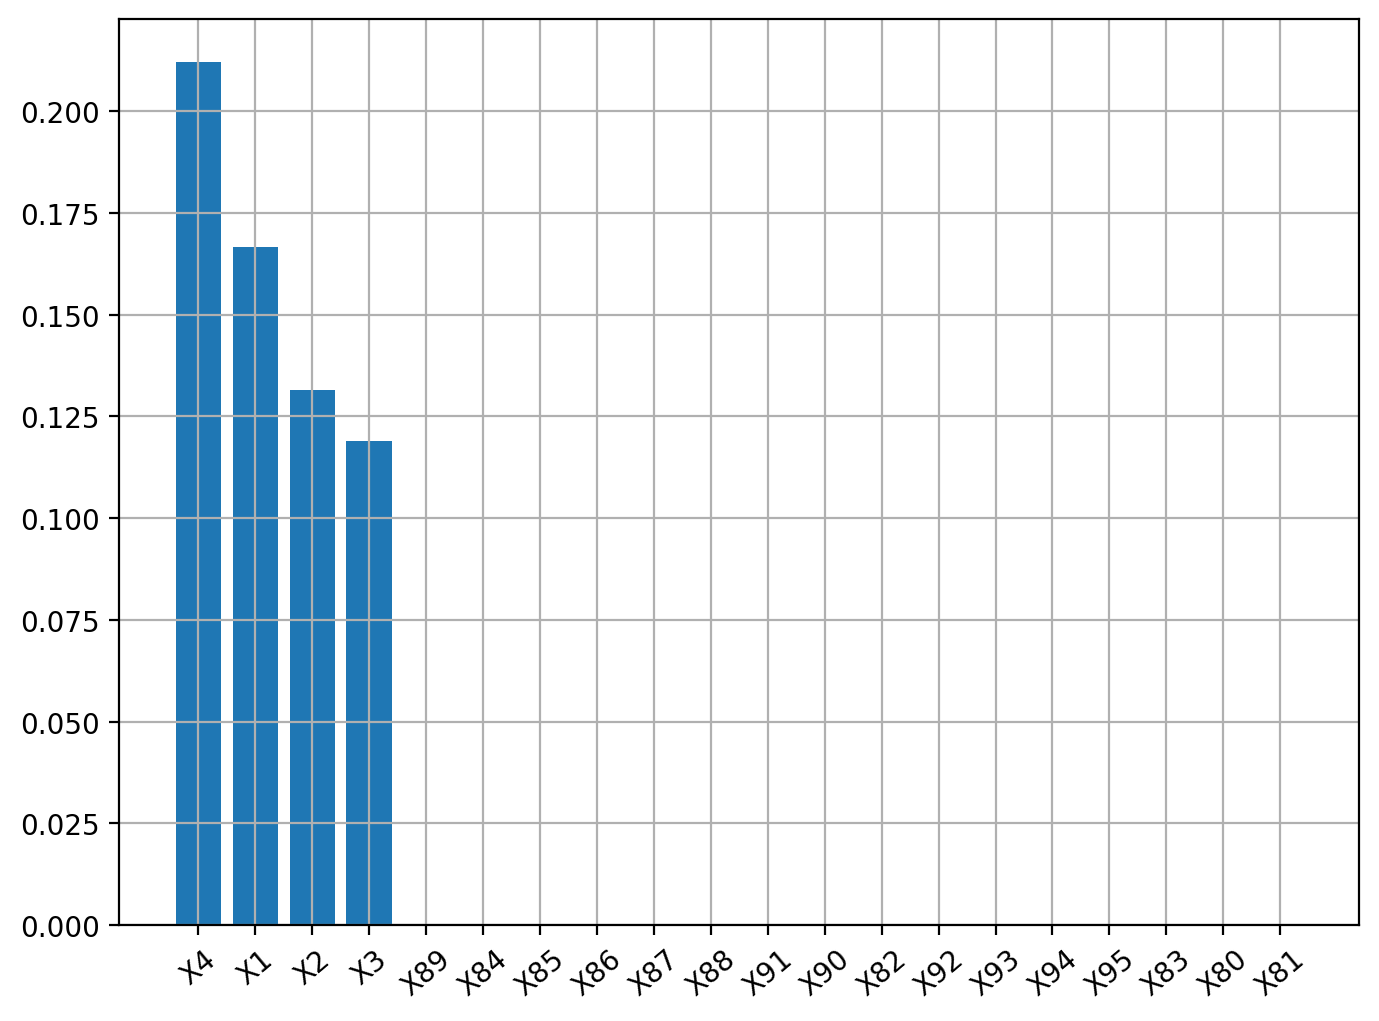

In [8]:
plt.figure(figsize=[8,6], dpi=200)
plt.bar(np.arange(20),model_PH1.get_index_score()[:20])
plt.xticks(np.arange(20),model_PH1.get_features()[:20], rotation=40)
plt.grid()
plt.show()

### Proposed (NOCCO)

In [9]:
model_PN1 = api.Proposed_NOCCO_Lasso(lam = [np.inf, 5e-5], eps = 1e-3)
model_PN1.input(X,y,featname = data1.columns[1:])

True

In [10]:
model_PN1.regression_multi(kernels=['Gaussian'])

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features and Gaussian kernel for the target.


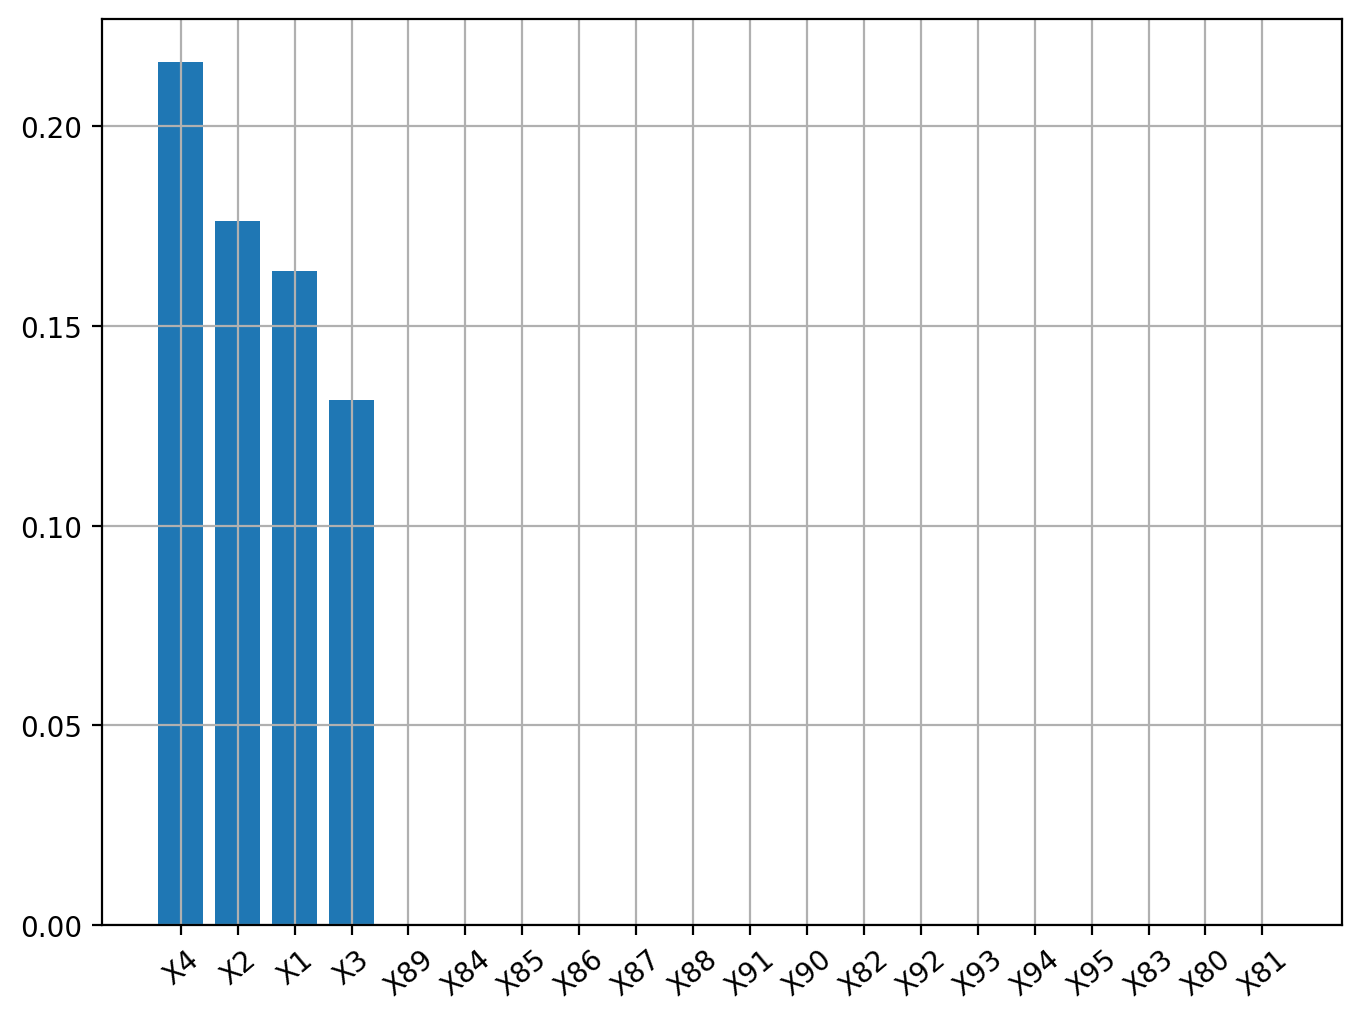

In [11]:
plt.figure(figsize=[8,6], dpi=200)
plt.bar(np.arange(20),model_PN1.get_index_score()[:20])
plt.xticks(np.arange(20),model_PN1.get_features()[:20], rotation=40)
plt.grid()
plt.show()

## Data2: Non-additive model

In [12]:
N, P = 1000, 1000
mean = np.zeros(P)
cov = np.eye(P)
np.random.seed(2)

$$
y\in\mathbb{R}^{1000}, X\in\mathbb{R}^{1000\times1000}
$$

In [13]:
X = np.random.multivariate_normal(mean = mean, cov = cov, size = N)
y = X[:,0] * np.exp(2 * X[:,1]) + X[:,2]**2 + np.random.normal(loc=0, scale=1, size=N)

$$
y=X_1\exp(2X_2)+X_3^2+\epsilon
$$

In [14]:
data2 = pd.DataFrame(np.c_[y.reshape(-1,1),X], columns = ['y'] + [f'X{p+1}' for p in range(P)])
data2.describe()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X991,X992,X993,X994,X995,X996,X997,X998,X999,X1000
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.973463,0.023288,-0.049999,0.035428,-0.001712,0.015169,-0.008052,-0.029885,-0.012755,0.040996,...,0.044867,-0.003113,0.015413,0.023625,-0.035813,0.043011,0.051107,0.005640,0.010450,0.018511
std,13.256483,0.991841,1.006799,1.014789,1.028246,1.021380,0.955916,1.010338,1.022051,0.961945,...,0.982041,0.965937,0.968151,1.007564,0.970728,0.957619,0.957190,1.027877,0.999896,1.008089
min,-238.664375,-2.803930,-3.040821,-3.131877,-2.948815,-3.531438,-3.377890,-3.829989,-4.109165,-3.233004,...,-2.668022,-2.925431,-3.334320,-2.781584,-3.856230,-2.676957,-2.896714,-3.167082,-3.760697,-3.658034
25%,-0.619232,-0.669358,-0.713947,-0.629200,-0.666953,-0.612824,-0.645238,-0.650667,-0.727027,-0.613812,...,-0.615754,-0.650306,-0.632708,-0.682130,-0.665218,-0.623901,-0.632976,-0.711479,-0.674730,-0.663400
50%,0.788955,0.027602,-0.039843,-0.014024,0.037908,0.054550,0.008866,-0.061064,0.013491,0.019829,...,0.061542,0.005622,0.053131,0.050225,-0.061419,0.098674,0.051580,0.022772,-0.017848,0.009733
75%,2.374469,0.687430,0.642530,0.754526,0.681826,0.704399,0.628773,0.632387,0.647425,0.735749,...,0.700651,0.654188,0.635314,0.751129,0.616588,0.710963,0.653693,0.691396,0.674974,0.716906
max,122.699596,3.312053,2.762553,3.484096,2.958997,3.565985,3.417453,4.200607,3.049466,2.882913,...,3.701033,2.805071,3.779385,2.752685,3.509434,3.205691,3.521335,3.508425,3.937568,3.127471


### Proposed (HSIC)

In [15]:
model_PH2 = api.Proposed_HSIC_Lasso(lam = [np.inf,4e-6])
model_PH2.input(X,y,featname = data2.columns[1:])

True

In [16]:
model_PH2.regression_multi(kernels=['Gaussian'])

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features and Gaussian kernel for the target.


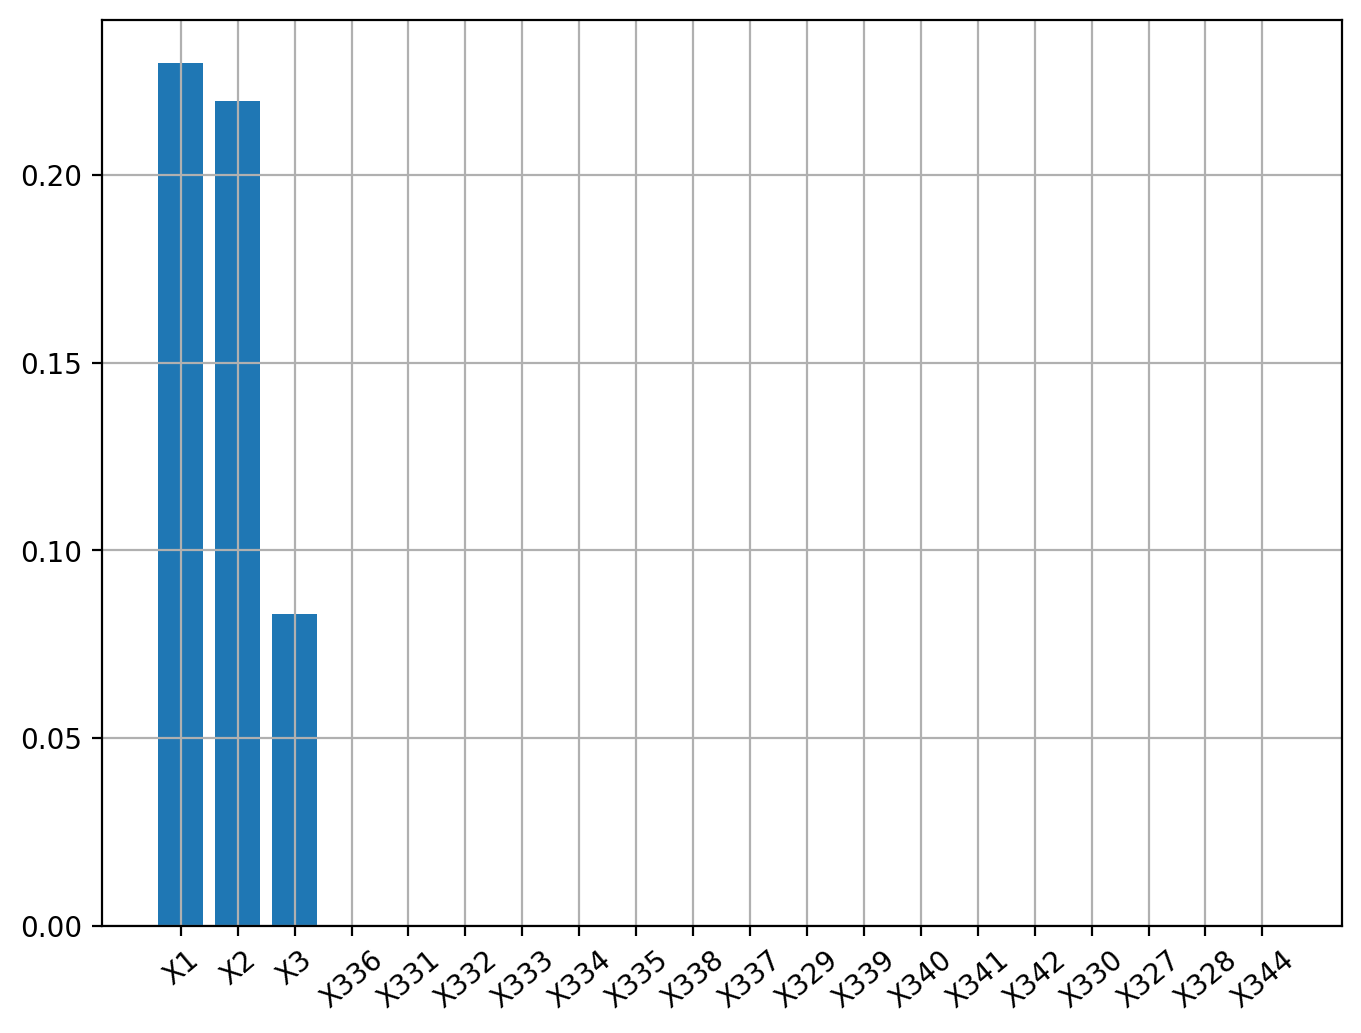

In [17]:
plt.figure(figsize=[8,6], dpi=200)
plt.bar(np.arange(20),model_PH2.get_index_score()[:20])
plt.xticks(np.arange(20),model_PH2.get_features()[:20], rotation=40)
plt.grid()
plt.show()

### Proposed (NOCCO)

In [18]:
model_PN2 = api.Proposed_NOCCO_Lasso(lam = [np.inf,2e-5], eps = 1e-3)
model_PN2.input(X,y,featname = data2.columns[1:])

True

In [19]:
model_PN2.regression_multi(kernels=['Gaussian'])

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features and Gaussian kernel for the target.


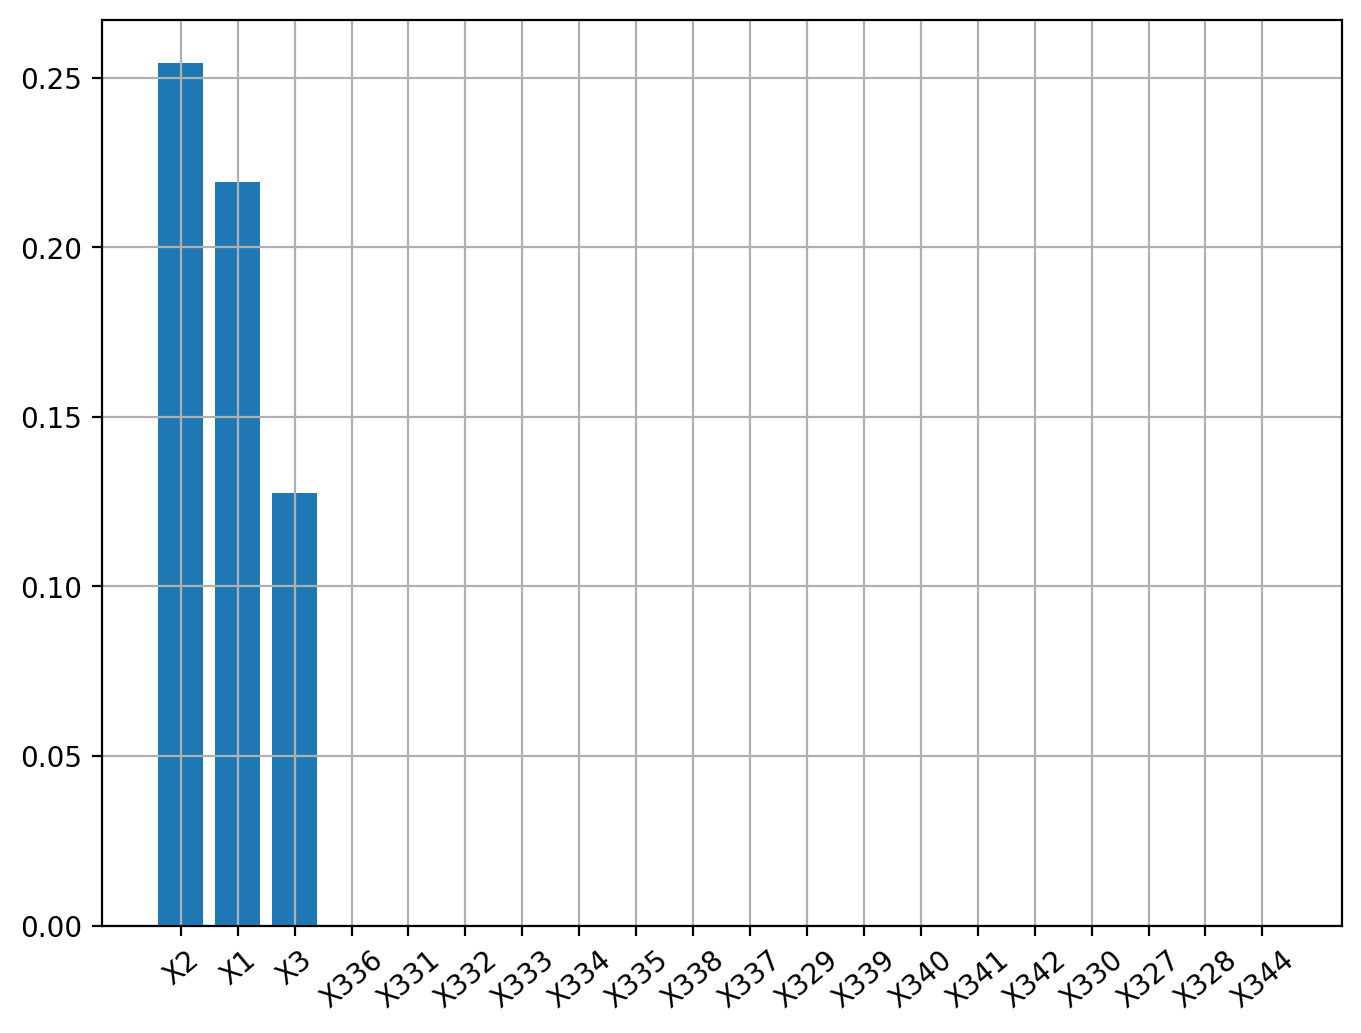

In [20]:
plt.figure(figsize=[8,6], dpi=200)
plt.bar(np.arange(20),model_PN2.get_index_score()[:20])
plt.xticks(np.arange(20),model_PN2.get_features()[:20], rotation=40)
plt.grid()
plt.show()